<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Disk_Stacking_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disk Stacking

You're given a non-empty array of arrays where each subarray holds three integers and represents a disk. These integers denote each disk's width, depth, and height, respectively. Your goal is to stack up the disks and to maximize the total height of the stack. A disk must have a strictly smaller width, depth, and height than any other disk below it.

Write a function that returns an array of the disks in the final stack, starting with the top disk and ending with the bottom disk. Note that you can't rotate disks; in other words, the integers in each subarray must represent `[width, depth, height]` at all times.

You can assume that there will only be one stack with the greatest total height.

Sample Input

```
disks = [[2, 1, 2], [3, 2, 3], [2, 2, 8], [2, 3, 4], [1, 3, 1], [4, 4, 5]]
```



Sample Output

```
[[2, 1, 2], [3, 2, 3], [4, 4, 5]]
// 10 (2 + 3 + 5) is the tallest height we can get by
// stacking disks following the rules laid out above.
```



In [ ]:
# Time O(n^2)
# Spece O(n)

def diskStacking(disks):
  # sort height ascending
  disks = sorted(disks, key=lambda x: x[2])
  heights = [0 for _ in range(len(disks))]
  top_disk = [None for _ in range(len(disks))]
  max_height_idx = 0

  for i in range(len(disks)):
    heights[i] = disks[i][2]
    for j in range(i, 0 - 1, -1):
      if is_valid_stack(disks[i], disks[j]):
        if heights[j] + disks[i][2] > heights[i]:
          heights[i] = heights[j] + disks[i][2]
          top_disk[i] = j
    if heights[i] > heights[max_height_idx]:
      max_height_idx = i
  
  return build_sequence(top_disk, disks, max_height_idx)
  
def is_valid_stack(bottom_disk, top_disk):
  return bottom_disk[0] > top_disk[0] and bottom_disk[1] > top_disk[1] and bottom_disk[2] > top_disk[2]

def build_sequence(top_disk, disks, current_idx):
  sequence = []
  while current_idx != None:
    sequence.append(disks[current_idx])
    current_idx = top_disk[current_idx]
  return list(reversed(sequence))

In [ ]:
disks = [[2, 1, 2], [3, 2, 3], [2, 2, 8], [2, 3, 4], [1, 3, 1], [4, 4, 5]]
print(diskStacking(disks))

[[2, 1, 2], [3, 2, 3], [4, 4, 5]]


In [ ]:
disks = [[2, 1, 2], [3, 2, 3], [2, 2, 8]]
print(diskStacking(disks))

[[2, 2, 8]]


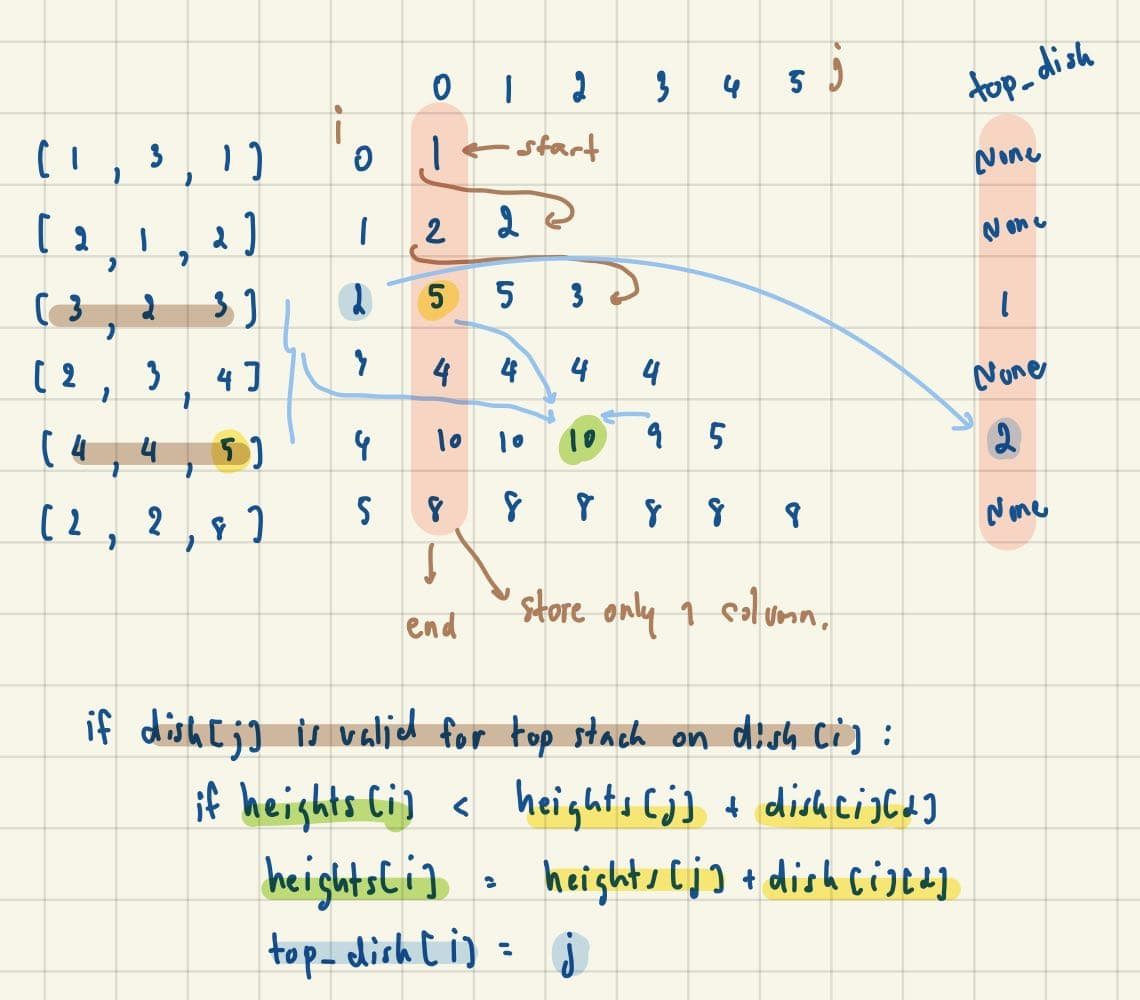